## a test to see if I can alter uvplane data with strong rfi

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### this is a starting point for maniupulating uvplane data

### make a mock image and get the uv data

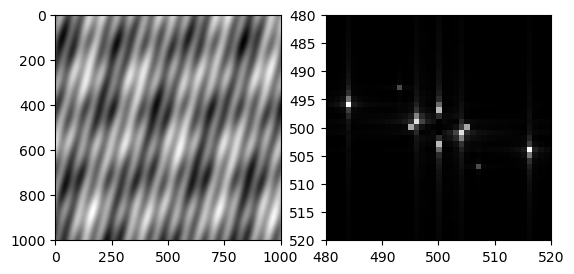

In [5]:

x = np.arange(-500, 501, 1)
X, Y = np.meshgrid(x, x)
amplitudes = 0.5, 0.25, 1, 0.75, 1
wavelengths = 200, 100, 250, 300, 60
angles = 0, np.pi / 4, np.pi / 9, np.pi / 2, np.pi / 12
gratings = np.zeros(X.shape)
for amp, w_len, angle in zip(amplitudes, wavelengths, angles):
    gratings += amp * np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / w_len
    )
# Calculate Fourier transform of the sum of the gratings
ft = np.fft.ifftshift(gratings)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)
plt.set_cmap("gray")
plt.subplot(121)
plt.imshow(gratings)
plt.subplot(122)
plt.imshow(abs(ft))
plt.xlim([480, 520])
plt.ylim([520, 480])  # Note, order is reversed for y
plt.show()

array([[ 1.15320106e-13+4.67020106e-05j, -7.58599119e-14-1.18035596e-04j,
        -4.85056887e-14+1.89374578e-04j, ...,
        -1.66443002e-14+1.67301631e-04j, -7.68000636e-15-9.59630871e-05j,
         5.47802989e-14+2.46297152e-05j],
       [-1.56403456e-13-6.87751973e-05j, -2.27850366e-13+1.40109707e-04j,
         1.24475496e-13-2.11449831e-04j, ...,
        -7.11258826e-14-1.45229896e-04j,  2.25811014e-15+7.38910847e-05j,
        -5.22095223e-15-2.55722672e-06j],
       [ 1.57843450e-13+9.08503706e-05j, -1.01196649e-13-1.62186507e-04j,
        -1.32450205e-13+2.33528471e-04j, ...,
        -6.07976204e-14+1.23158286e-04j, -2.10351900e-14-5.18185041e-05j,
         1.09275615e-13-1.95165404e-05j],
       ...,
       [ 1.76491515e-13+1.95165404e-05j, -8.75706645e-14+5.18185044e-05j,
        -4.86008534e-14-1.23158286e-04j, ...,
        -9.77376954e-14-2.33528471e-04j, -3.37514400e-13+1.62186507e-04j,
        -5.34632739e-15-9.08503708e-05j],
       [-1.68793092e-13+2.55722679e-06j,  1.

In [65]:
### read askap antenna locations and plot in uv plane
import pandas as pd
# Parse the askap_stations_itrf.txt file
# Assuming the file has columns: Station, X, Y, Z
antennas = pd.read_csv('askap_stations_itrf.txt',sep='\s+',skiprows=1)

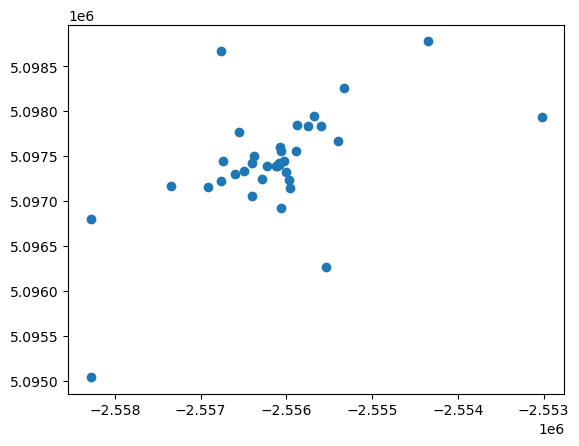

In [66]:
x=antennas['X'].values
y=antennas['Y'].values
z=antennas['Z'].values
plt.scatter(x,y)
plt.show()

In [67]:
xmin,xmax = np.min(x),np.max(x)
ymin,ymax = np.min(y),np.max(y)
zmin,zmax = np.min(z),np.max(z)
print(f"X range: {xmax-xmin}")
print(f"Y range: {ymax-ymin}")
print(f"Z range: {zmax-zmin}")

X range: 5260.18899999978
Y range: 3738.4769999999553
Z range: 5362.796000000089


In [75]:
###let's just make something with x and y frame on the plane...
min_unit=np.min([np.abs(np.diff(x)).min(),np.abs(np.diff(y)).min()])
print(f"Min unit: {min_unit}")
x_norm=(x-(xmin+xmax)/2)/min_unit
y_norm=(y-(ymin+ymax)/2)/min_unit
square_length=np.max([np.int64((xmax-xmin)/min_unit),np.int64((ymax-ymin)/min_unit)])
print(f"Square length: {square_length}")


Min unit: 0.25600000005215406
Square length: 20547


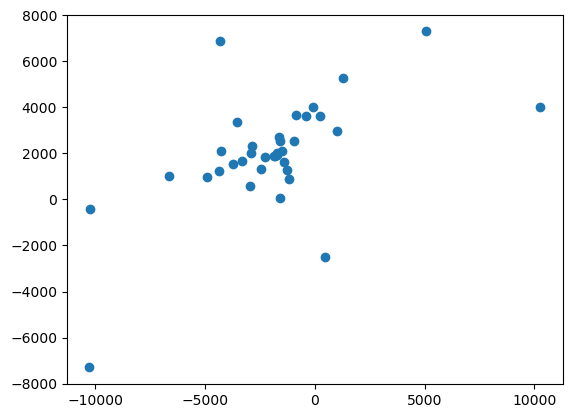

In [76]:
plt.scatter(x_norm,y_norm)
plt.show()